<a href="https://colab.research.google.com/github/SoheilBadri2000/hoSKlearnKerasTensorflow/blob/main/ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [73]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

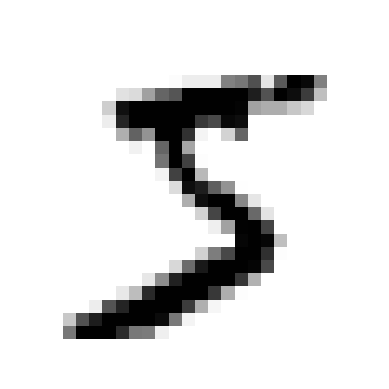

In [9]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [10]:
y[0]

'5'

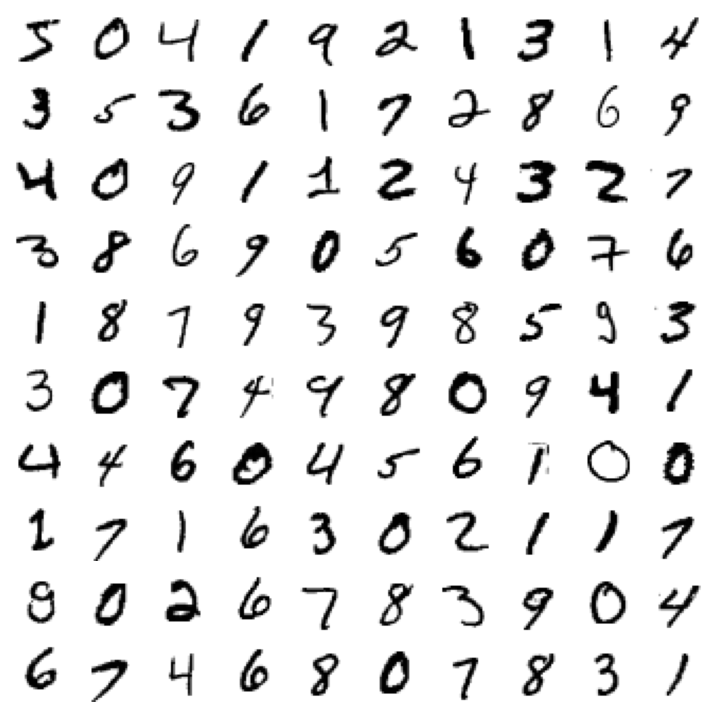

In [11]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
  plt.subplot(10, 10, idx + 1)
  plot_digit(image_data)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
y_train_5 = (y_train=='5') # True for all 5s, False for all other digits
y_test_5 = (y_test=='5')

In [14]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

# Measuring Accuracy Using Cross-Validation

In [16]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train, not y_train_5

SVC(random_state=42)

In [17]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [18]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [19]:
class_id = some_digit_scores.argmax()
class_id

5

In [20]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [21]:
svm_clf.classes_[class_id]

'5'

In [22]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [23]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [24]:
len(ovr_clf.estimators_)

10

In [25]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [27]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [28]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [30]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

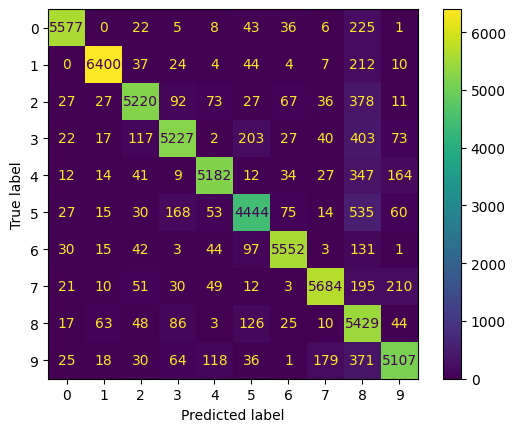

In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

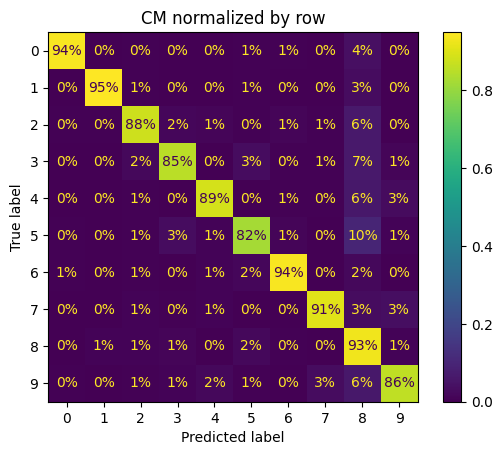

In [39]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.title("CM normalized by row")
plt.show()

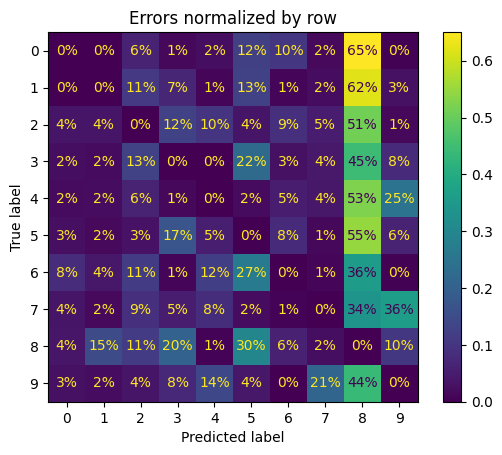

In [36]:
# Put zero weight on correct predictions
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title("Errors normalized by row")
plt.show()

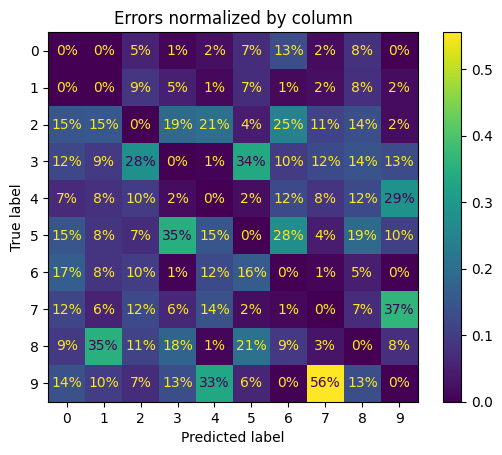

In [38]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")
plt.title("Errors normalized by column")
plt.show()

In [61]:
cl_a, cl_b = '3', '5'
x_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # 3s predicted as 3
x_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # 3s predicted as 5
x_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # 5s predicted as 3
x_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # 5s predicted as 5

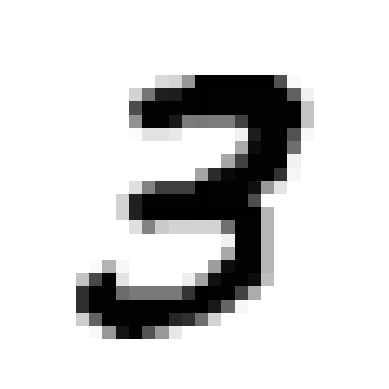

In [62]:
plot_digit(x_aa[:1, :])

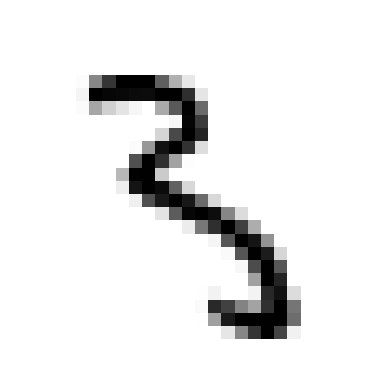

In [63]:
plot_digit(x_ab[:1, :])

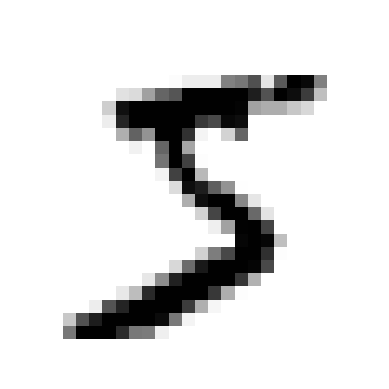

In [64]:
plot_digit(x_ba[:1, :])

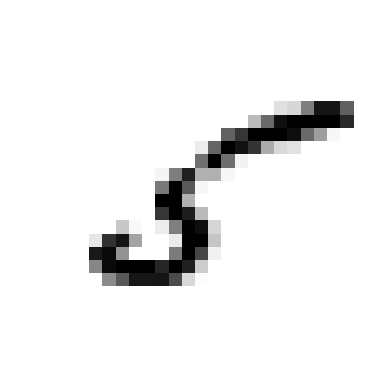

In [65]:
plot_digit(x_bb[:1, :])

# Multilabel Classification

In [68]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [69]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [72]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [75]:
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [76]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification

In [83]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

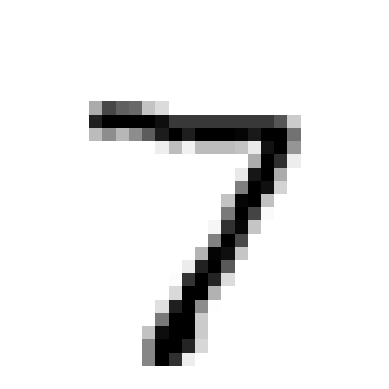

In [84]:
plot_digit(X_test[0])

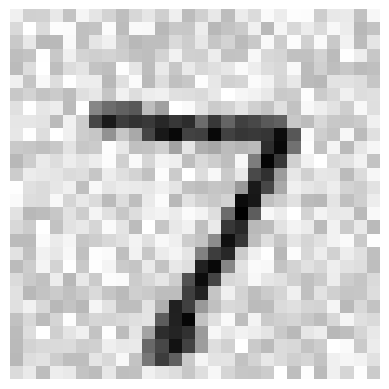

In [85]:
plot_digit(X_test_mod[0])

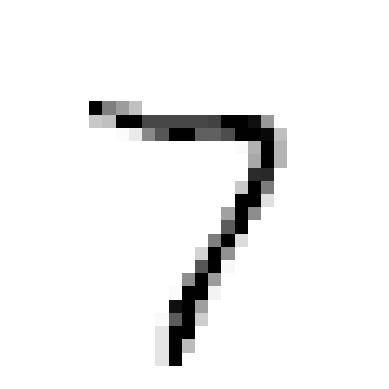

In [86]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()